In [26]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

with open('D2.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    D2_X_list = []
    D2_Y_list = []
    
    next(csv_reader)
    for row in csv_reader:
        D2_X_list.append(row[0])
        D2_Y_list.append(row[1])

D2_X_list = np.array(D2_X_list)
D2_X_list = D2_X_list.astype(float)
D2_Y_list = np.array(D2_Y_list)
D2_Y_list = D2_Y_list.astype(float)
data2_set = np.zeros((len(D2_X_list),2))
data2_set[:,0] = D2_X_list
data2_set[:,1]=D2_Y_list


with open('D3.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    D3_X_list = []
    D3_Y_list = []
    
    next(csv_reader)
    for row in csv_reader:
        D3_X_list.append(row[0])
        D3_Y_list.append(row[1])


D3_X_list = np.array(D3_X_list)
D3_X_list = D3_X_list.astype(float)
D3_Y_list = np.array(D3_Y_list)
D3_Y_list = D3_Y_list.astype(float)
data3_set = np.zeros((len(D3_X_list),2))
data3_set[:,0] = D3_X_list
data3_set[:,1]=D3_Y_list

no_of_cluster = 0



def plot_fun(ind):
    
    if(ind ==2):
        plt.scatter(D2_X_list, D2_Y_list)
        plt.xlabel('X Axis Label')
        plt.ylabel('Y Axis Label')
        plt.title('scatter plot of points')
        plt.show()
    if(ind == 3):
        plt.scatter(D3_X_list, D3_Y_list)
        plt.xlabel('X Axis Label')
        plt.ylabel('Y Axis Label')
        plt.title('scatter plot of points')
        plt.show()

def plot_K_distance(ind, K):  #it plots the k-distance graph for the given data
    data_set = []
    if(ind ==2):
        data_set = data2_set
    if(ind ==3):
        data_set = data3_set

    nbrs = NearestNeighbors(n_neighbors=K, algorithm='auto').fit(data_set)
    distances, indices = nbrs.kneighbors(data_set)
#     print("distances: ")
#     print(distances)
#     print("indices: ")
#     print(indices)
    k_distance = distances[:, -1]
#     k_distancce = sum(distances)/len(distances)


    plt.plot(np.sort(k_distance)[::-1])
    plt.title("K-distance vs epsilon graph")
    plt.xlabel("Points sorted by decreasing k-distance")
    plt.ylabel("k-distance")
    plt.show()

def find_epsilon_list(ind):

    #for the corresponding dataset plot the K-distance and find the correspoinding set

    epsilon_list = []

    if(ind == 2):
        for i in range(10,41):
            epsilon_list.append(i)
    if(ind == 3):
        for i in range(0,2):
            epsilon_list.append(i)

    return epsilon_list 

def find_neighbours(data_set,i, eps):  #it will return the neighbours of point i        
    neighbour_list = []
    for j in range(len(data_set)):
        if np.linalg.norm(data_set[i]-data_set[j]) < eps:
            if(i !=j):
                neighbour_list.append(j)
    
    return neighbour_list

def extend_cluster_fun(data_set, ind, neighbour_list, cluster_val, cluster_array, eps, min_samples):
    cluster_array[ind] = cluster_val

    for i in neighbour_list:
    
        if(cluster_array[i] == 0 ): #that is the point within the cluster
            cluster_array[i] = cluster_val
            new_neighbour_list = find_neighbours(data_set, i, eps)
            if(min_samples <= len(new_neighbour_list)):
                neighbour_list +=new_neighbour_list
        elif(cluster_array[i] == -1): #that is the border point 
            cluster_array[i] = cluster_val


def assign_cluster(ind, eps, min_samples):   #for the corresponding data it returns the cluster array
    data_set = []
    if(ind ==2):
        data_set = data2_set
    if(ind == 3):
        data_set = data3_set

    cluster_list  = []  #assigning the cluster num 0 to all data points
    for i in range(len(data_set)):
        cluster_list.append(0)

    cluster_val = 0
    for i in range(len(data_set)):

        if(cluster_list[i] != 0):
            continue

        else:
            neighbour_list = find_neighbours(data_set, i,eps)

            if(len(neighbour_list) < min_samples):
                cluster_list[i] = -1
            else:
                cluster_val +=1
                cluster_list[i] = cluster_val
                extend_cluster_fun(data_set, i, neighbour_list, cluster_val, cluster_list, eps, min_samples)
    

    return cluster_list 

#plot the clusters
def plot_cluster(ind, cluster_list):
    data_set = []
    if(ind ==2):
        data_set = data2_set
    if(ind == 3):
        data_set = data3_set

    plt.scatter(data_set[:,0], data_set[:,1], c = cluster_list, cmap='Paired')
    plt.xlabel('X Axis Label')
    plt.ylabel('Y Axis Label')
    plt.title('scatter plot of points')
    plt.show()
    
def k_means(ind, k):
    data_set = []
    if(ind ==2):
        data_set = data2_set
    if(ind == 3):
        data_set = data3_set

    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10).fit(data_set)
    cluster_list = kmeans.labels_
    return cluster_list    

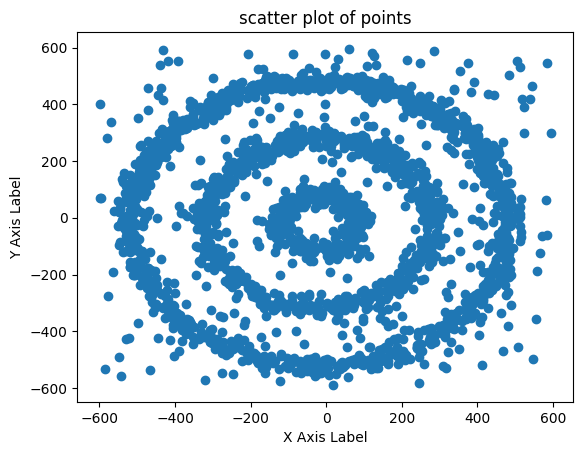

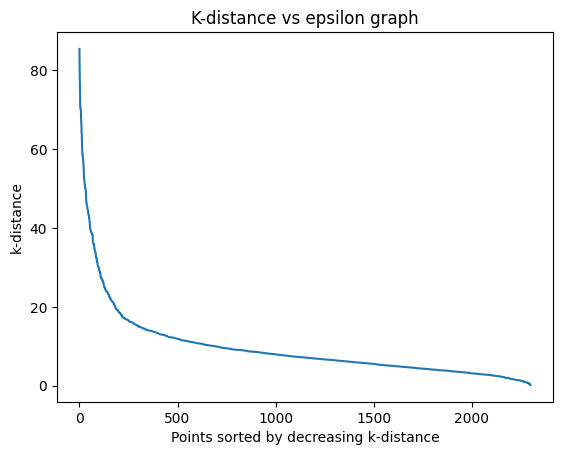

In [27]:
#plotting the original data
plot_fun(2)
plot_K_distance(2,2)

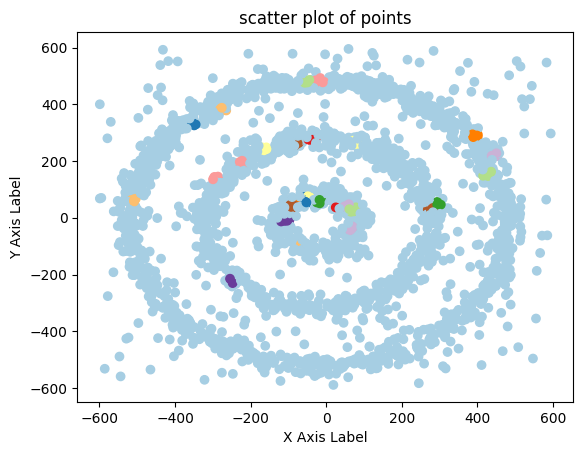

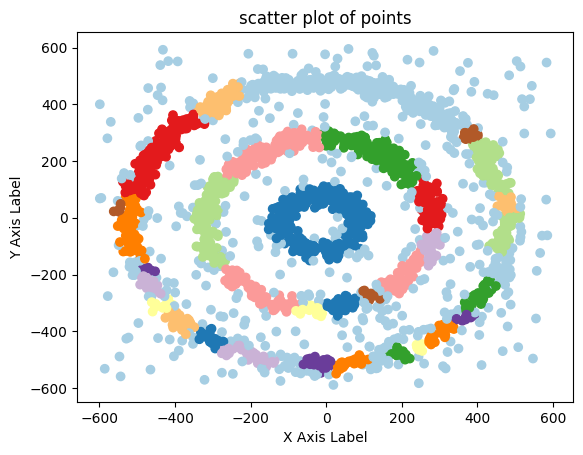

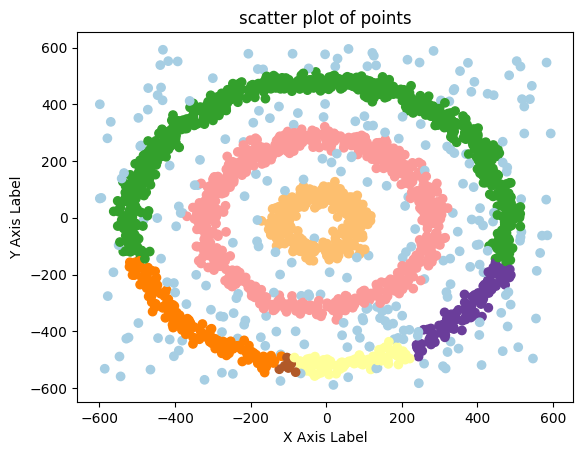

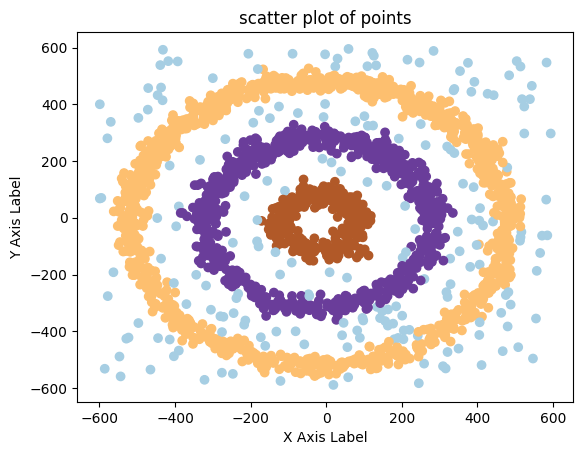

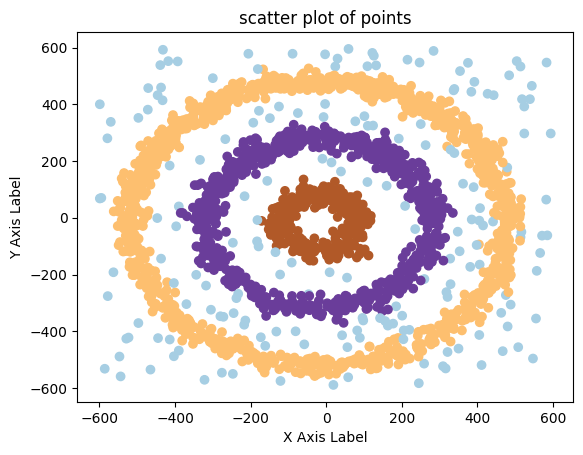

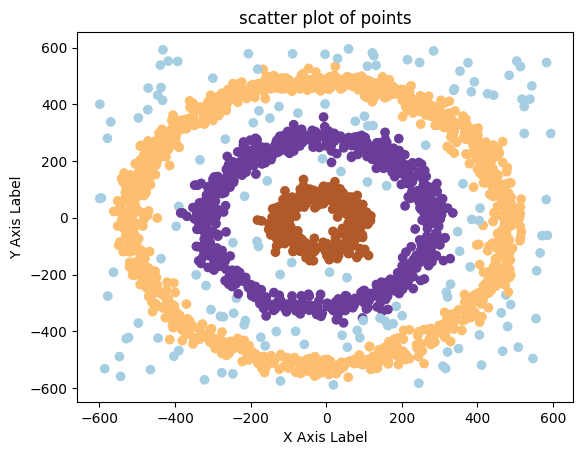

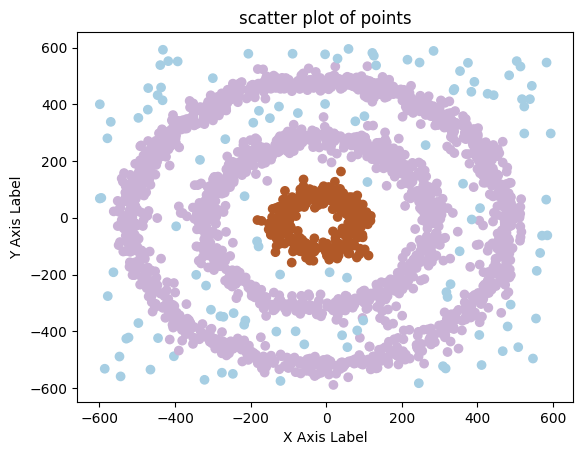

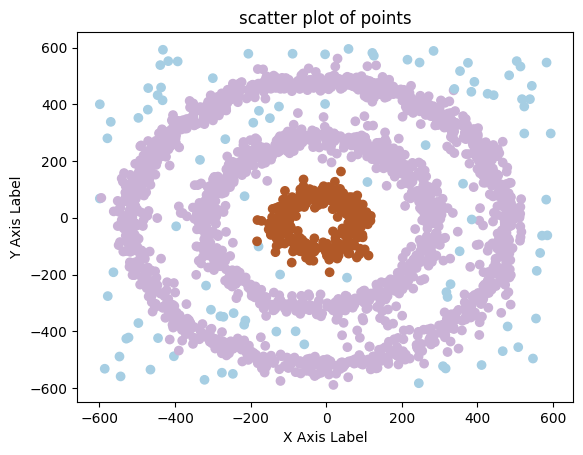

In [28]:
#plotting the cluser for the given epsilon value and min_samples 
epsilon_list = [10,20,25,28,30,35,40,45]

for eps in epsilon_list:
    clu_list = assign_cluster(2,eps,5)
    plot_cluster(2, clu_list)

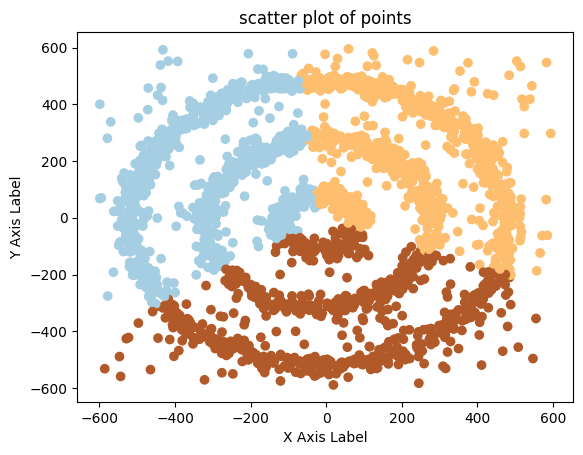

In [29]:
# from above we got the best clustering as 3 

K = 3

clu_list = k_means(2, K)
plot_cluster(2,clu_list)

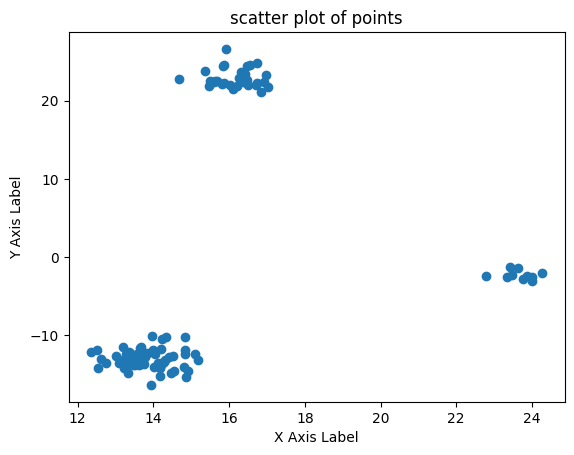

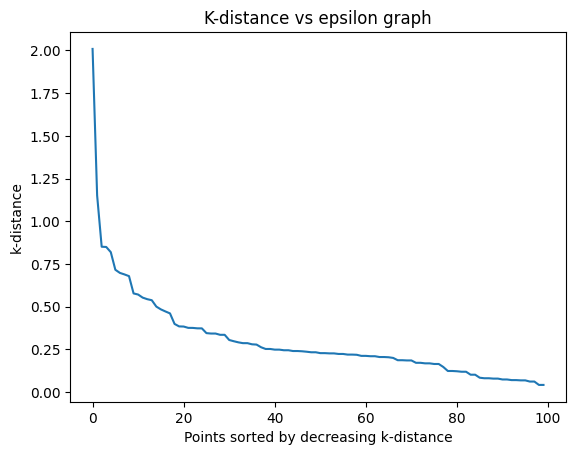

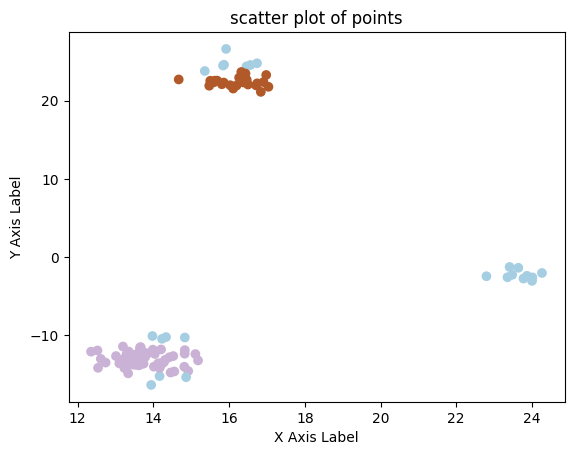

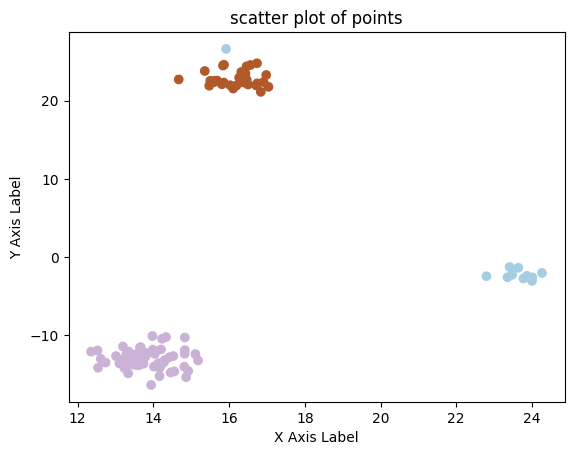

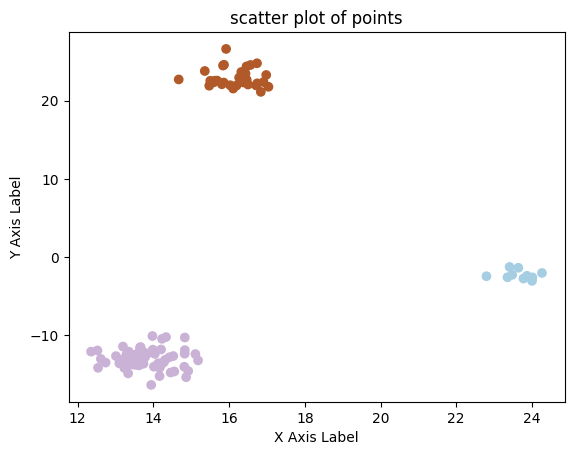

In [32]:
#plotting the data_set3
plot_fun(3)
plot_K_distance(3,2)

eps_list = [1,2,3]
for eps in eps_list:
    clu_array = assign_cluster(3,eps,10)
    plot_cluster(3,clu_array)

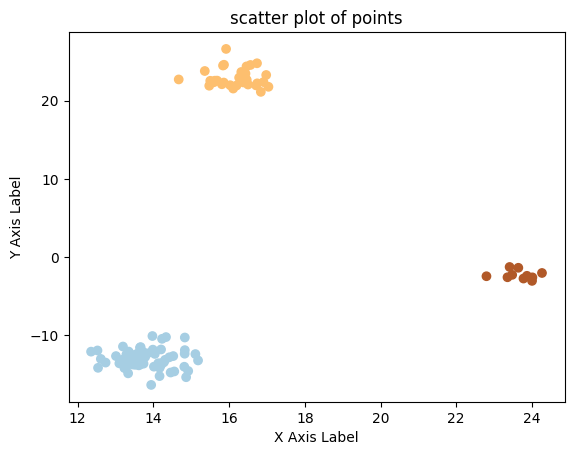

In [33]:
K =3

clu_list = k_means(3,K)
plot_cluster(3, clu_list)